In [1]:
!pip install datashader
!pip install pandas
!pip install numpy
!pip install dask[dataframe]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 63.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 4.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import datashader as ds
import datashader.transfer_functions as tf

datos = pd.read_csv('https://datosabiertos.jcyl.es/web/jcyl/risp/es/medio-ambiente/calidad-aire-historico-horario/1284808467480.csv', sep=";")

filtrado = datos[(datos['Provincia'] == 'Valladolid') & (datos['Estación']== "Renault1")]


def data_a_datetime(data_str):
  data, hora_str = data_str.split()
  if hora_str == '24':
    return pd.to_datetime(data, dayfirst=True) + pd.DateOffset(days=1)
  else:
    return pd.to_datetime(data_str, dayfirst=True)

filtrado['Fecha'] = filtrado['Fecha'].apply(data_a_datetime)
print(filtrado.head())

/usr/local/lib/python3.11/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 272, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))
<ipython-input-2-1a7d3adc6d2c>:6: DtypeWarning: Columns (2,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  datos = pd

                  Fecha  CO (mg/m3) NO (ug/m3)  NO2 (ug/m3) O3 (ug/m3)  \
1   2019-01-01 00:00:00         NaN       52.0         33.0        2.0   
97  2018-12-31 23:00:00         NaN       33.0         36.0        1.0   
137 2018-12-31 22:00:00         NaN       48.0         45.0        2.0   
173 2018-12-31 21:00:00         NaN       58.0         57.0        1.0   
222 2018-12-31 20:00:00         NaN       86.0         67.0        1.0   

    PM10 (ug/m3) PM25 (ug/m3) SO2 (ug/m3)   Provincia  Estación  Latitud  \
1            NaN          NaN         NaN  Valladolid  Renault1     41.6   
97           NaN          NaN         NaN  Valladolid  Renault1     41.6   
137          NaN          NaN         NaN  Valladolid  Renault1     41.6   
173          NaN          NaN         NaN  Valladolid  Renault1     41.6   
222          NaN          NaN         NaN  Valladolid  Renault1     41.6   

     Longitud  
1     -4.7325  
97    -4.7325  
137   -4.7325  
173   -4.7325  
222   -4.7325  


<ipython-input-2-1a7d3adc6d2c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtrado['Fecha'] = filtrado['Fecha'].apply(data_a_datetime)


<ipython-input-7-84686a22507c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtrado['Fecha'] = filtrado['Fecha'].astype(int) / 10**9
<ipython-input-7-84686a22507c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtrado['NO (ug/m3)'] = pd.to_numeric(filtrado['NO (ug/m3)'], errors='coerce')


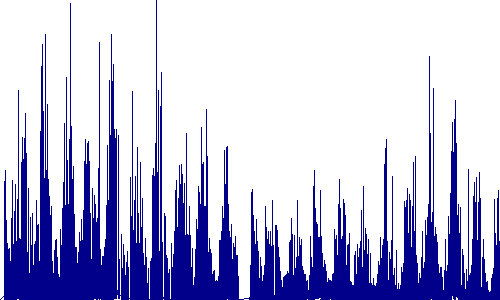

In [7]:
filtrado['Fecha'] = filtrado['Fecha'].astype(int) / 10**9
filtrado['NO (ug/m3)'] = pd.to_numeric(filtrado['NO (ug/m3)'], errors='coerce')
x_range = (filtrado['Fecha'].min(), filtrado['Fecha'].max())
y_range = (filtrado['NO (ug/m3)'].min(), filtrado['NO (ug/m3)'].max())
cvs = ds.Canvas(plot_width=500, plot_height=300, x_range=x_range, y_range=y_range)
agregado = cvs.line(filtrado, 'Fecha', 'NO (ug/m3)')
tf.shade(agregado)


<ipython-input-8-18c2dcbd1175>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtrado['NO2 (ug/m3)'] = pd.to_numeric(filtrado['NO2 (ug/m3)'], errors='coerce')


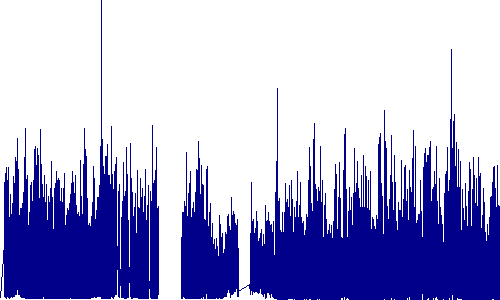

In [8]:
filtrado['NO2 (ug/m3)'] = pd.to_numeric(filtrado['NO2 (ug/m3)'], errors='coerce')
xx_range = (filtrado['Fecha'].min(), filtrado['Fecha'].max())
yy_range = (filtrado['NO2 (ug/m3)'].min(), filtrado['NO2 (ug/m3)'].max())
cvs2 = ds.Canvas(plot_width=500, plot_height=300, x_range=xx_range, y_range=yy_range)
agregado2 = cvs2.line(filtrado, 'Fecha', 'NO2 (ug/m3)')
tf.shade(agregado2)

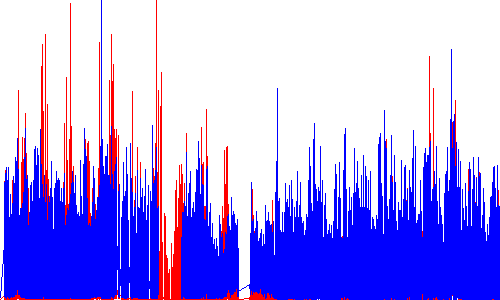

In [11]:
fecha = (min(filtrado['Fecha'].min(), filtrado['Fecha'].min()), max(filtrado['Fecha'].max(), filtrado['Fecha'].max()))
valores = (min(filtrado['NO (ug/m3)'].min(), filtrado['NO2 (ug/m3)'].min()), max(filtrado['NO (ug/m3)'].max(), filtrado['NO2 (ug/m3)'].max()))
agregado3 = cvs.line(filtrado, 'Fecha', 'NO (ug/m3)')
agregado4 = cvs2.line(filtrado, 'Fecha', 'NO2 (ug/m3)')

combi = tf.stack(tf.shade(agregado3, cmap="red"), tf.shade(agregado4, cmap="blue"))
combi